In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load & Convert
countries_df = pd.read_excel("https://raw.githubusercontent.com/taylorduncan/DSC640/main/all-weeks-countries-netflix.xlsx")
global_df    = pd.read_excel("https://raw.githubusercontent.com/taylorduncan/DSC640/main/all-weeks-global-netflix.xlsx")
popular_df   = pd.read_excel("https://raw.githubusercontent.com/taylorduncan/DSC640/main/most-popular-netflix.xlsx")

# Parse 'week' as datetime (before any grouping/plotting)
countries_df["week"] = pd.to_datetime(countries_df["week"])
global_df   ["week"] = pd.to_datetime(global_df   ["week"])

# Fill any missing 'season_title'
for df in (countries_df, global_df, popular_df):
    if "season_title" in df.columns:
        df["season_title"].fillna("N/A", inplace=True)

# 1) MERGE for Country‐Level Hours
# bring weekly_hours_viewed from global_df into countries_df
countries_hours = countries_df.merge(
    global_df[["week", "show_title", "weekly_hours_viewed"]],
    on=["week", "show_title"],
    how="left"
)

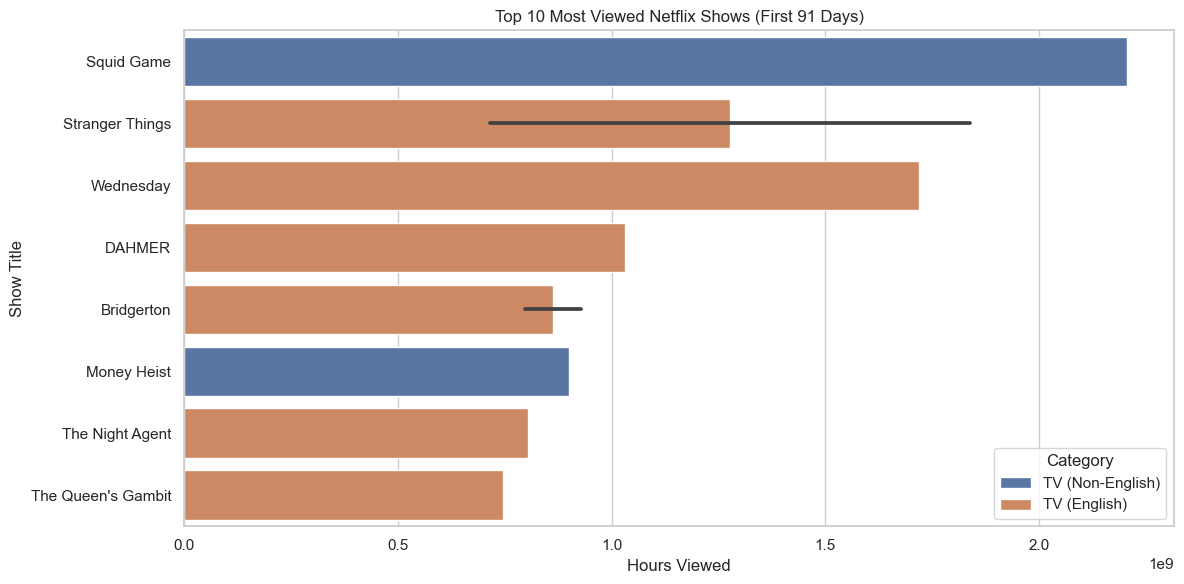

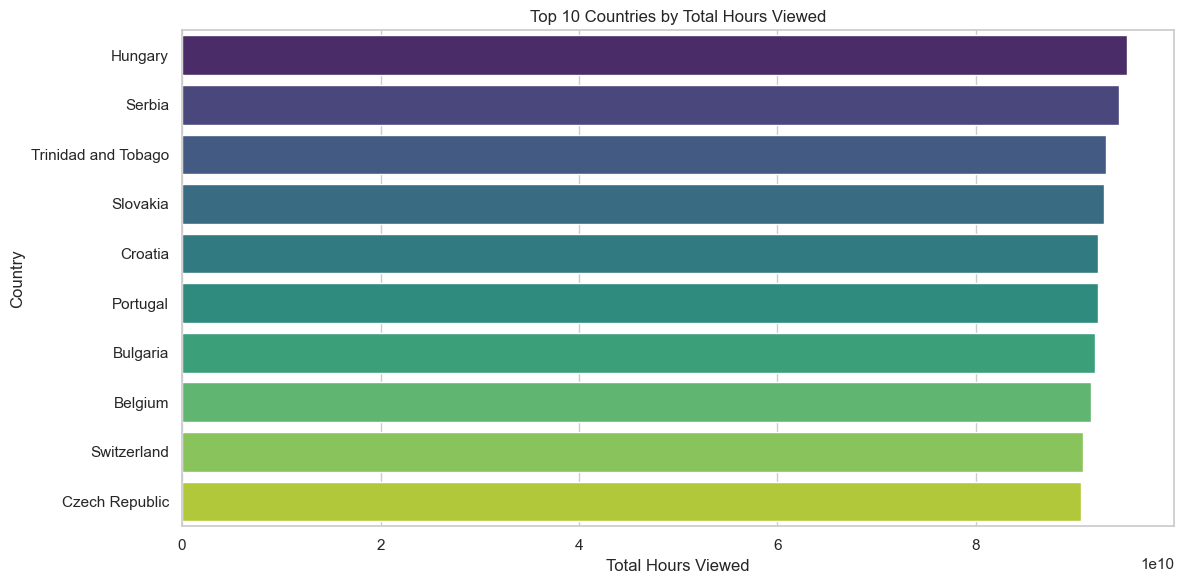

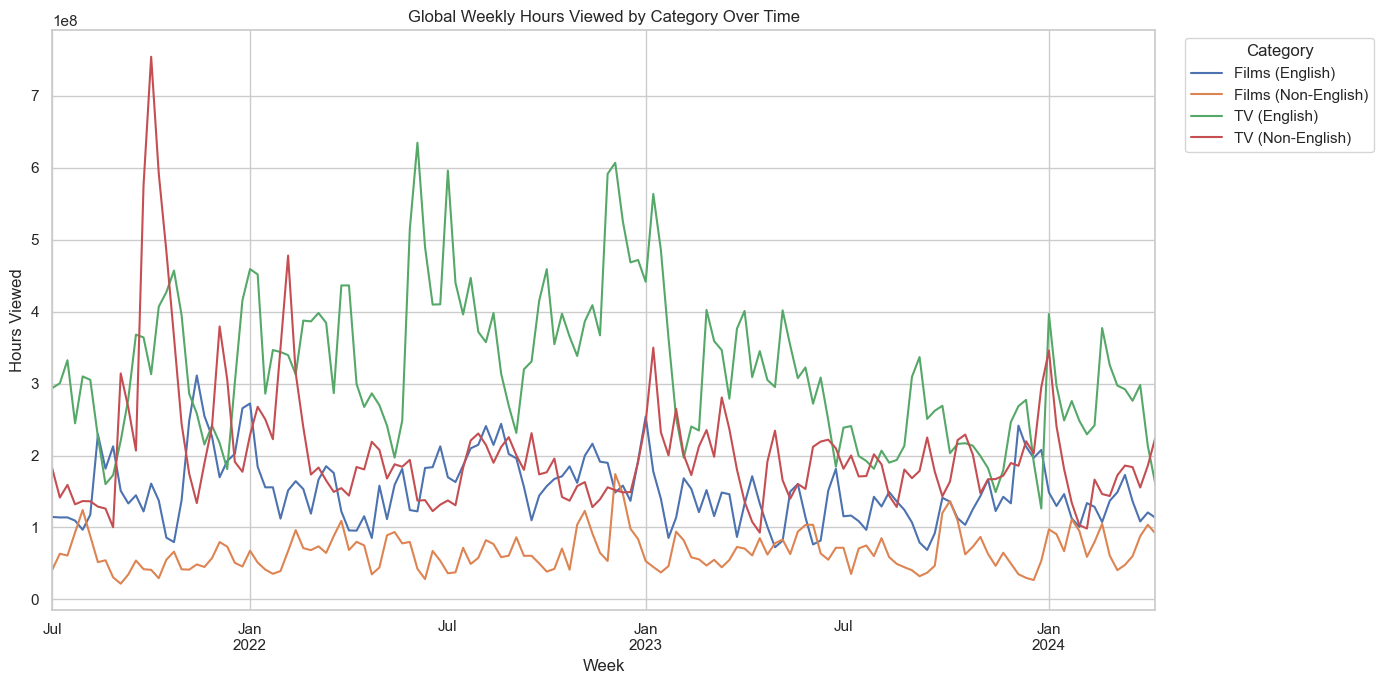

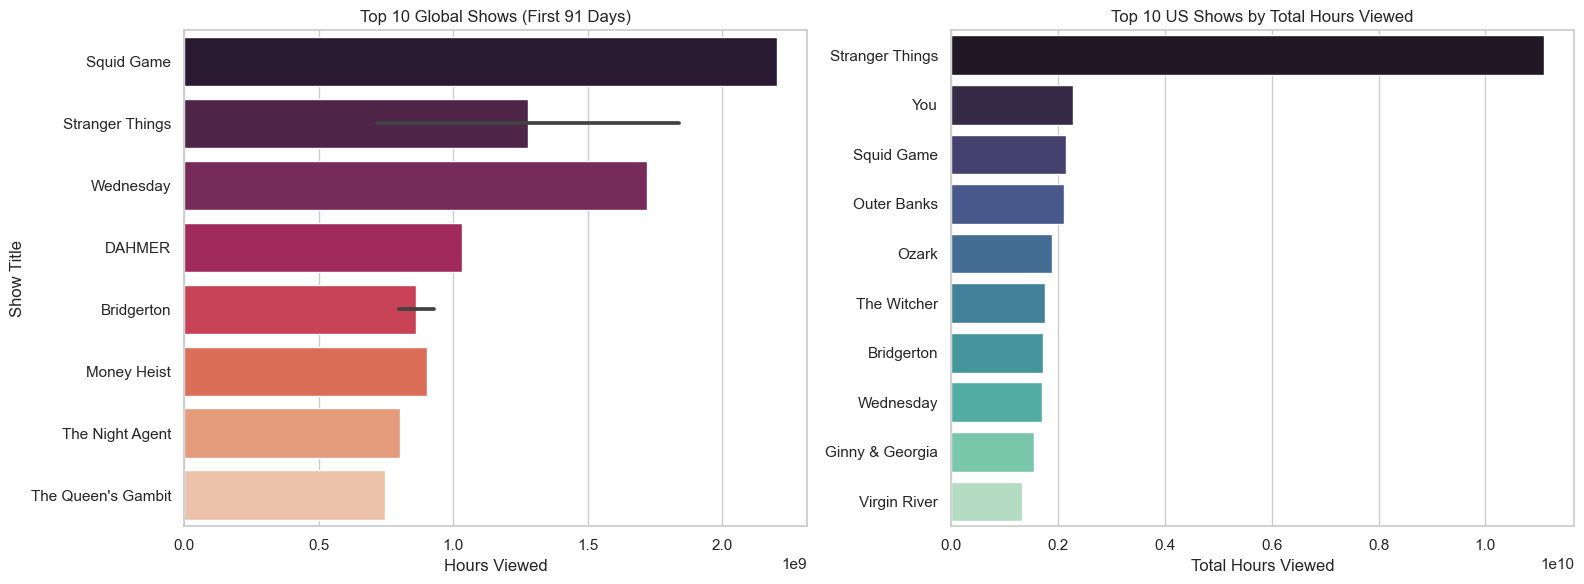

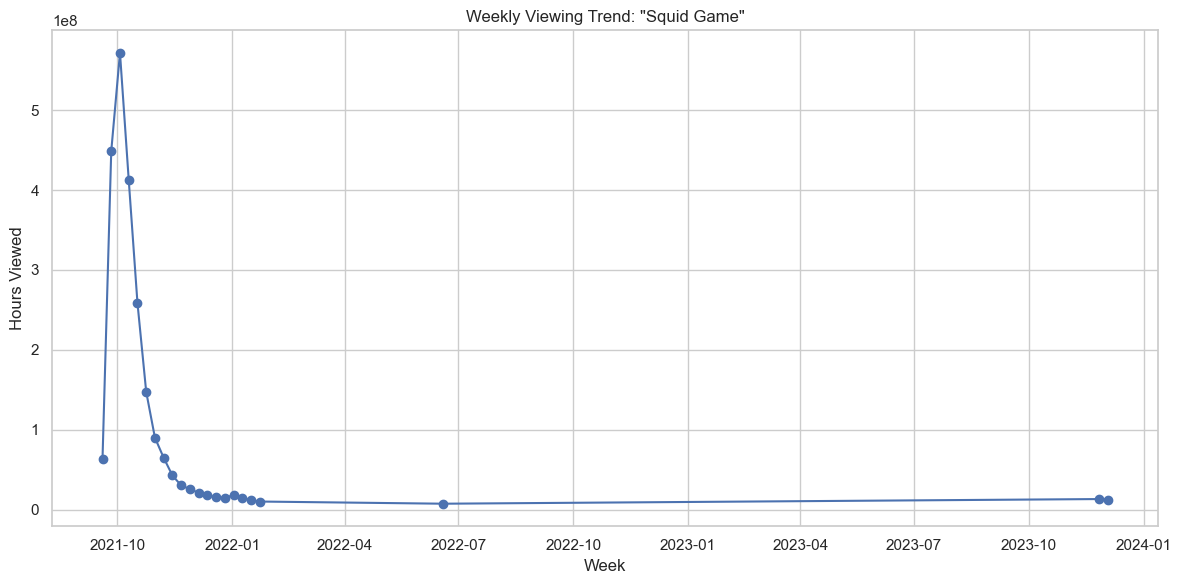

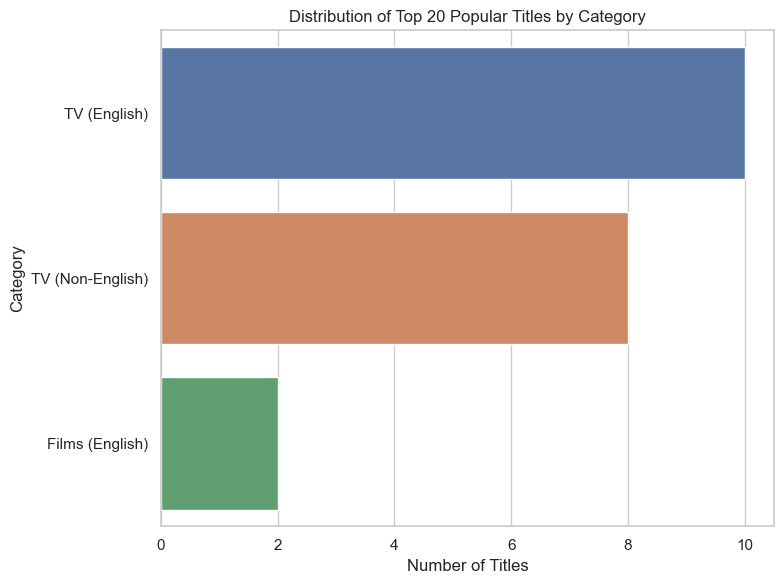

In [14]:

# 2) Visualizations
sns.set(style="whitegrid")

# 2.1 Top 10 Most Viewed Global Shows (First 91 Days)
top10 = popular_df.nlargest(10, "hours_viewed_first_91_days")
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top10,
    y="show_title",
    x="hours_viewed_first_91_days",
    hue="category",
    dodge=False
)
plt.title("Top 10 Most Viewed Netflix Shows (First 91 Days)")
plt.xlabel("Hours Viewed")
plt.ylabel("Show Title")
plt.legend(title="Category", loc="lower right")
plt.tight_layout()
plt.savefig("visual1_top10_popular.png")
plt.show()


# 2.2 Top 10 Countries by Total Hours Viewed
country_totals = (
    countries_hours
    .groupby("country_name")["weekly_hours_viewed"]
    .sum()
    .nlargest(10)
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.barplot(
    data=country_totals,
    y="country_name",
    x="weekly_hours_viewed",
    palette="viridis",
    orient="h"
)
plt.title("Top 10 Countries by Total Hours Viewed")
plt.xlabel("Total Hours Viewed")
plt.ylabel("Country")
plt.tight_layout()
plt.savefig("visual2_countries_total_hours.png")
plt.show()


# 2.3 Global Weekly Hours Viewed by Category Over Time
cat_weekly = (
    global_df
    .groupby(["week", "category"])["weekly_hours_viewed"]
    .sum()
    .reset_index()
)
pivot = cat_weekly.pivot(
    index="week", columns="category", values="weekly_hours_viewed"
)
plt.figure(figsize=(14, 7))
pivot.plot(ax=plt.gca())
plt.title("Global Weekly Hours Viewed by Category Over Time")
plt.xlabel("Week")
plt.ylabel("Hours Viewed")
plt.legend(title="Category", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig("visual3_category_over_time.png")
plt.show()


# 2.4 Top 10 Global vs. Top 10 US Shows
#  - global: first 91 days
#  - US: sum of weekly_hours_viewed
us_totals = (
    countries_hours[countries_hours["country_iso2"] == "US"]
    .groupby("show_title")["weekly_hours_viewed"]
    .sum()
    .nlargest(10)
    .reset_index()
)
glob_totals = top10[["show_title", "hours_viewed_first_91_days"]]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(
    ax=ax1,
    data=glob_totals,
    y="show_title",
    x="hours_viewed_first_91_days",
    palette="rocket",
    orient="h"
)
ax1.set_title("Top 10 Global Shows (First 91 Days)")
ax1.set_xlabel("Hours Viewed")
ax1.set_ylabel("Show Title")

sns.barplot(
    ax=ax2,
    data=us_totals,
    y="show_title",
    x="weekly_hours_viewed",
    palette="mako",
    orient="h"
)
ax2.set_title("Top 10 US Shows by Total Hours Viewed")
ax2.set_xlabel("Total Hours Viewed")
ax2.set_ylabel("")

plt.tight_layout()
plt.savefig("visual4_global_vs_us.png")
plt.show()


# 2.5 Weekly Trend of a Top Show (e.g., "Squid Game")
focus = "Squid Game"
trend = global_df[global_df["show_title"] == focus][["week", "weekly_hours_viewed"]]
plt.figure(figsize=(12, 6))
plt.plot(trend["week"], trend["weekly_hours_viewed"], marker="o")
plt.title(f'Weekly Viewing Trend: "{focus}"')
plt.xlabel("Week")
plt.ylabel("Hours Viewed")
plt.tight_layout()
plt.savefig("visual5_squid_game_trend.png")
plt.show()


# 2.6 Distribution of Top 20 Popular Titles by Category
top20 = popular_df.nlargest(20, "hours_viewed_first_91_days")
dist = top20["category"].value_counts().reset_index()
dist.columns = ["category", "count"]

plt.figure(figsize=(8, 6))
sns.barplot(
    data=dist,
    y="category",
    x="count",
    palette="deep"
)
plt.title("Distribution of Top 20 Popular Titles by Category")
plt.xlabel("Number of Titles")
plt.ylabel("Category")
plt.tight_layout()
plt.savefig("visual6_category_distribution.png")
plt.show()


In [ ]:
''' 
250 Word write Up 

Define the Story 
 As a content strategist at Netflix preparing to pitch a new original series to senior executives. 
 Drawing on three publicly available Top 10 datasets—weekly country-level trends, global weekly performance, and first-91-day totals—you will demonstrate which genres and formats resonate most strongly across key markets. 
 By synthesizing global and regional patterns into a cohesive narrative, you aim to show how a strategically crafted series can capture proven audience appetites. 
 Your story weaves data insights with creative vision, guiding executives toward a greenlight decision grounded in empirical evidence. 

Audience, Purpose & Medium 
 This paper and its supporting visuals target Netflix executives and data-savvy content decision-makers who appreciate both high-level storytelling and rigorous analysis. 
 The primary purpose is to convince them to commission a new original series inspired by established viewer behaviors. 
 To achieve this, we employ a 10–15 slide PowerPoint deck for executive presentation—pairing each insight with a clear chart—alongside a Python Jupyter Notebook that documents data transformations and chart-generation code. 
 This dual-medium approach ensures both strategic clarity and full technical transparency. 

Design Choices 
 A consistent color palette—Netflix red for global aggregates and slate blue for regional breakdowns—reinforces brand identity while distinguishing data segments. 
 All charts use white backgrounds, sans-serif fonts, and generous white space to maximize readability. 
 Bar charts illustrate rank-based comparisons (e.g., Top 10 shows and Top 10 countries), line graphs reveal temporal trends (such as the weekly evolution of “Squid Game”), and horizontal layouts accommodate long titles without truncation. 
 Slide layouts balance concise annotations with impactful visuals, guiding viewers’ eyes naturally from insight to recommendation. 

Ethical Considerations 
 To maintain transparency, every data transformation is documented. 
 I aggregated weekly hours by country and title, merged global viewership into country records, and filtered down to the top quartile of performers. 
 Missing values were treated as zeros, and hours viewed were used as a proxy for popularity—without implying causation. 
 Because the Top 10 lists tend to favor English-language or heavily marketed titles, we clearly label all filters and display legends that identify any exclusions. 
 The dataset, sourced directly from Netflix’s public Top 10 listings, contains no personally identifiable information, satisfying legal and compliance standards. 
 By fully disclosing assumptions, risks, and mitigation steps—each annotated in both the deck and notebook—we ensure stakeholders can trust our methods and confidently act on the insights presented. 

'''
